scipy.optimize.newton

scipy.optimize.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [3]:
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

fprime is not provided, use the secant method:

In [4]:
root = optimize.newton(f, 1.5)
root

1.0000000000000016

In [5]:
root = optimize.newton(f, 1.5, fprime2=lambda x: 6 * x)
root

1.0000000000000016

Only fprime is provided, use the Newton-Raphson method:

In [6]:
root = optimize.newton(f, 1.5, fprime=lambda x: 3 * x**2)
root

1.0

Both fprime2 and fprime are provided, use Halley’s method:

In [7]:
root = optimize.newton(f, 1.5, fprime=lambda x: 3 * x**2,
                       fprime2=lambda x: 6 * x)
root

1.0

When we want to find zeros for a set of related starting values and/or function parameters, we can provide both of those as an array of inputs:

In [11]:
f = lambda x, a: x**3 - a
fder = lambda x, a: 3 * x**2
rng = np.random.default_rng()
x = rng.standard_normal(100)
a = np.arange(-50, 50)
vec_res = optimize.newton(f, x, fprime=fder, args=(a, ), maxiter=200)

The above is the equivalent of solving for each value in (x, a) separately in a for-loop, just faster:

In [13]:
loop_res = [optimize.newton(f, x0, fprime=fder, args=(a0,))
            for x0, a0 in zip(x, a)]
np.allclose(vec_res, loop_res)

True

Plot the results found for all values of a:

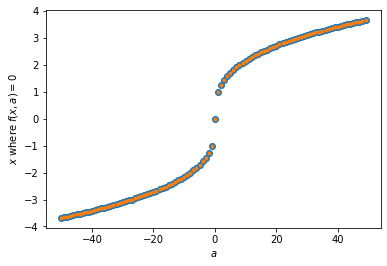

In [14]:
analytical_result = np.sign(a) * np.abs(a)**(1/3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a, analytical_result, 'o')
ax.plot(a, vec_res, '.')
ax.set_xlabel('$a$')
ax.set_ylabel('$x$ where $f(x, a)=0$')
plt.show()